<a href="https://colab.research.google.com/github/parthivz/Fundamentals-of-GenAI-Course-Lab/blob/main/PyTorch_4_Exercise_Classifier_nnLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implement a binary classifier with `torch.nn.Linear`

In [2]:
import torch as pt
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline
pt.manual_seed(42);

## Start by practicing boolean operations on boolean tensors. Don't worry, there is a point to this exercise :)

In [4]:
# Generate a random tensor
a = pt.randn(10)
print(a)




tensor([ 0.5349,  0.8094,  1.1103, -1.6898, -0.9890,  0.9580,  1.3221,  0.8172,
        -0.7658, -0.7506])


## Create a boolean tensor named `b` by converting the `a` tensor such that `b` holds `True` for positive values of `a` and `False` for negative and zero values of `a`
* **hint:** `b` must have the same shape as `a`

In [5]:

# Create boolean tensor b (True if a > 0, else False)
b = a > 0
print(b)

tensor([ True,  True,  True, False, False,  True,  True,  True, False, False])


## Create another boolean tensor named `c` with values that are the opposite of `b`
* **hint:** you can use a different logical expression with the values of the `a` tensor or use the `~` operator

In [6]:
# Create boolean tensor c (opposite of b)
c = ~b
print(c)


tensor([False, False, False,  True,  True, False, False, False,  True,  True])


## Create 2 tensors that are the logical `and` as well as `or` of `b` and `c`. For each of the tensors, count the number of the `True` values in the tensor
* **hint:** in Python `&` is the logical `and` while `|` is the logical `or`

In [7]:
# Logical AND and OR
logical_and = b & c
logical_or = b | c

# Count True values
print(f"True values in AND: {logical_and.sum().item()}")
print(f"True values in OR: {logical_or.sum().item()}")


True values in AND: 0
True values in OR: 10


## Create a tensor named `d` by concatenating `b` and `c` using the `pt.cat` method that takes a list of tensors

In [8]:
# Concatenate b and c
d = pt.cat([b, c])
print(d.shape)  # Should be [20]



torch.Size([20])


## Reshape the `d` tensor to be 3 dimensional with the shape of `[5, 2, 2]` and save the result to tensor `e`

In [9]:
# Reshape into 3D tensor [5, 2, 2]
e = d.reshape(5, 2, 2)
print(e.shape)  # Should be [5, 2, 2]


torch.Size([5, 2, 2])


# Create a tensor `f` that contains the sum of the number of the `True` values along the last (trailing) dimension of the `e` tensor while keeping the original dimensions
* **hint:** check out the `keepdims` parameter

In [10]:
# Sum along the last dimension while keeping dimensions
f = e.sum(dim=-1, keepdim=True)
print(f.shape)  # Should be [5, 2, 1]



torch.Size([5, 2, 1])


## Use the `squeeze` method on the tensor with the sum of the `True` values and confirm that its shape changed to 2 dimensions instead of 3

In [11]:
# Remove singleton dimensions
f_squeezed = f.squeeze()
print(f_squeezed.shape)  # Should be [5, 2]


torch.Size([5, 2])


The `squeeze` method is useful when you need to reduce the dimension of a tensor that has one or more dimensions of length `1`. For example, if you have a tensor with a shape [3, 1, 4], the 2nd dimension can be `squeeze`d to `[3,4]`

## Next, get started on generating data for your spam/not-spam classification problem

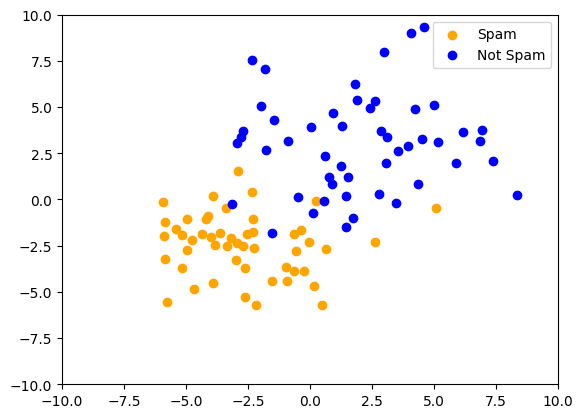

In [12]:
NUM = 50

# Spam data points
Xs = pt.normal(0, 2, [NUM, 2]) - 3
plt.scatter(Xs[:, 0], Xs[:, 1], color='orange', label="Spam")

# Not spam data points
Xns = pt.normal(0, 3, [NUM, 2]) + 3
plt.scatter(Xns[:, 0], Xns[:, 1], color='blue', label="Not Spam")

plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.legend()
plt.show()


## Create a tensor array `X` with spam and not spam data values having the shape `[100, 2]`

In [13]:
X = pt.cat([Xs, Xns])
X.shape

torch.Size([100, 2])

## Create a `y` tensor with positive/negative values for the spam/not spam data in the `X` tensor. Let's have `1` be spam, and `-1` not spam.

In [14]:
y = pt.cat([pt.ones(NUM), -pt.ones(NUM)])
print(y.shape)  # Should be [100]


torch.Size([100])


## Create a model using `nn.Linear`. Disable the `bias` term in the model.

In [15]:
# Define a binary classifier model with no bias
model = nn.Linear(2, 1, bias=False).double()


## Implement the `forward` method for the model. Don't forget to check the shape of your predictions!

In [19]:
# Forward pass
X = X.double()  # Ensure X is double
y = y.double()  # Ensure y is double
X_bias = X.double()  # Convert to double
w_analytical = pt.inverse(X_bias.T @ X_bias) @ X_bias.T @ y

y_pred = model(X)
print(y_pred.shape)  # Should be [100, 1]


torch.Size([100, 1])


## Implement the `loss` method to return the mean squared error of your predictions

In [20]:
# Mean Squared Error (MSE) loss function
def loss_fn(y_pred, y_true):
    return ((y_pred.view(-1) - y_true) ** 2).mean()

# Compute initial loss
loss = loss_fn(y_pred, y)
print(f"Initial Loss: {loss.item()}")


Initial Loss: 14.639837253101868


## Implement a `metric` method that takes the model predictions and the actual values and returns the accuracy (i.e. percentage correct) for the predictions.

In [21]:
# Compute accuracy
def accuracy(y_pred, y_true):
    return ((y_pred.view(-1) > 0) == (y_true > 0)).float().mean()

print(f"Initial Accuracy: {accuracy(y_pred, y).item():.2%}")


Initial Accuracy: 7.00%


## Implement a `for` loop that does 10 iterations of gradient descent, printing out the MSE and the accurary for each iteration
* **hint:** don't forget to use `zero_grad` function with your model
* **hint:** update the weights using the `weight.data` attribute of your model

In [22]:
# Learning rate
lr = 0.1

# Train for 10 iterations
for epoch in range(10):
    # Forward pass
    y_pred = model(X)

    # Compute loss
    loss = loss_fn(y_pred, y)

    # Compute accuracy
    acc = accuracy(y_pred, y)

    # Zero gradients
    model.zero_grad()

    # Backpropagation
    loss.backward()

    # Update weights manually
    with pt.no_grad():
        model.weight.data -= lr * model.weight.grad

    print(f"Epoch {epoch + 1}: MSE = {loss.item():.4f}, Accuracy = {acc.item():.2%}")


Epoch 1: MSE = 14.6398, Accuracy = 7.00%
Epoch 2: MSE = 105.6412, Accuracy = 92.00%
Epoch 3: MSE = 778.8839, Accuracy = 8.00%
Epoch 4: MSE = 5755.2227, Accuracy = 92.00%
Epoch 5: MSE = 42538.1096, Accuracy = 8.00%
Epoch 6: MSE = 314420.8724, Accuracy = 92.00%
Epoch 7: MSE = 2324057.4929, Accuracy = 8.00%
Epoch 8: MSE = 17178398.7771, Accuracy = 92.00%
Epoch 9: MSE = 126975091.7374, Accuracy = 8.00%
Epoch 10: MSE = 938543478.0001, Accuracy = 92.00%


## Re-render the original scatter plot with spam/not spam data points and add the decision boundary line on the plot.

* **hint:** to pass tensors to `plt.plot` you need to convert them to `numpy` arrays using `.detach().numpy()`

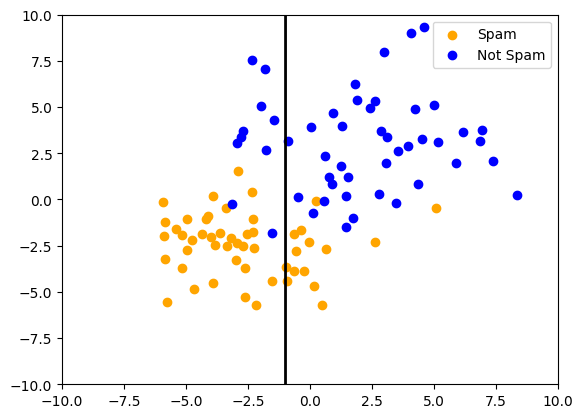

In [23]:
# Plot data points
plt.scatter(Xs[:, 0], Xs[:, 1], color='orange', label="Spam")
plt.scatter(Xns[:, 0], Xns[:, 1], color='blue', label="Not Spam")

# Plot decision boundary
xs = pt.linspace(-8, 8, 100).detach().numpy()
ys = model.weight.data[0, 0].item() * xs + model.weight.data[0, 1].item()
plt.plot(xs, ys, color='black', linewidth=2)

plt.ylim([-10, 10])
plt.xlim([-10, 10])
plt.legend()
plt.show()


## Compare the weights discovered by gradient descent to the weights according to the analytical solution for the problem
* you need the formula $ (X^T X)^{-1}X^Ty $
* **hint:** use `@` for tensor multiplication

In [24]:
# Compute (X^T * X)^(-1) * X^T * y
X_bias = X  # No bias term
w_analytical = pt.inverse(X_bias.T @ X_bias) @ X_bias.T @ y
print(f"Analytical Weights: {w_analytical}")
print(f"Gradient Descent Weights: {model.weight.data.view(-1)}")


Analytical Weights: tensor([-0.0992, -0.1716], dtype=torch.float64)
Gradient Descent Weights: tensor([13721.3099, 13594.7567], dtype=torch.float64)
